Check the galaxy ellipticities in a sample output of DM stack.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
import time
import numpy as np
import h5py
from clusters import data
from clusters.validation import get_filter_list, define_selection_filter, separate_star_gal,compute_elipticities

In [2]:
# Since the output is not the full output, load_cluster function in validation.py won't work. Load the cluster manually.
filename_noExtinction= 'MACSJ2243.3-0935_small.hdf5'
filename_withExtinction= 'MACSJ2243.3-0935_small_extinction.hdf5'
# read in the data
d = data.read_hdf5(filename_noExtinction)
print d.keys()
# read extinction law parameters
d2 = data.read_hdf5(filename_withExtinction)
print d2.keys()

ifilt = 'i_new'      # specify using the new i-band (i_old is a possibility for some outputs)
d2 = d2[u'extinction']    # correct_for_extinction wont take the dictionary.

# correct magnitude for extinction
data.correct_for_extinction(d['deepCoadd_forced_src'], d2, ifilt=ifilt)
data.correct_for_extinction(d['deepCoadd_meas'], d2, ifilt=ifilt)

[u'deepCoadd_meas', u'wcs', u'deepCoadd_forced_src']
[u'extinction']


In [3]:
# adapted code from check_star_elipticities to get only the galaxy ellipticities.
cat='deepCoadd_meas'
oid= 'id'
filters, nfilters = get_filter_list(d[cat])
filt = define_selection_filter(d, cat)
star, gal = separate_star_gal(d, cat, oid, nfilters, filt=filt)
gal = gal[gal['filter'] == 'i']

moments = {'gal': {'xx': gal['ext_shapeHSM_HsmSourceMoments_xx'],
                   'yy': gal['ext_shapeHSM_HsmSourceMoments_yy'],
                   'xy': gal['ext_shapeHSM_HsmSourceMoments_xy']}}

e1gal, e2gal = compute_elipticities(moments['gal']['xx'],
                                        moments['gal']['yy'],
                                        moments['gal']['xy'])

In [4]:
egal= np.sqrt(e1gal**2+e2gal**2)  # total ellipticity

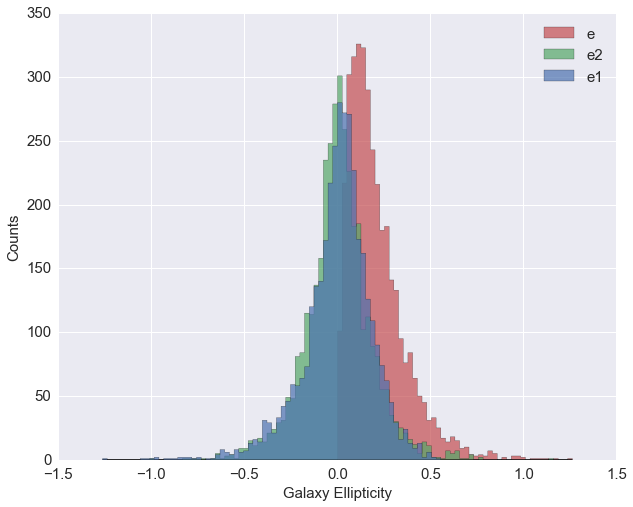

In [5]:
labelsize= 15
plt.hist([e1gal, e2gal, egal], bins= 100, label= ['e1', 'e2', 'e'], histtype='stepfilled', alpha= 0.7)
plt.legend(fontsize= labelsize)
plt.ylabel("Counts", fontsize=labelsize)
plt.xlabel("Galaxy Ellipticity", fontsize=labelsize)
plt.tick_params(labelsize=labelsize)
fig= plt.gcf()
fig.set_size_inches(10,8)
plt.show()